In [1]:
import wrangle as w
import clustering_feature_engineering as c

Opening data from local file.


In [2]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


In [3]:
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Road Bikes,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,...,0,0,0,1,0,0,0,0,0,1
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,...,0,0,0,0,0,0,0,0,0,1
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,0,1,0,0,0,0,0,1
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,...,0,0,0,1,0,0,0,0,0,1
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            34866 non-null  datetime64[ns]
 1   year                            34866 non-null  int64         
 2   month                           34866 non-null  object        
 3   customer_age                    34866 non-null  int64         
 4   customer_gender                 34866 non-null  object        
 5   country                         34866 non-null  object        
 6   state                           34866 non-null  object        
 7   product_category                34866 non-null  object        
 8   sub_category                    34866 non-null  object        
 9   quantity                        34866 non-null  int64         
 10  unit_cost                       34866 non-null  float64       
 11  un

In [5]:
# making clusters:
# tabular data
import pandas as pd
import numpy as np
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# sklearn:
# the thing that will do the clustering:
from sklearn.cluster import KMeans
# the thing that will do the scaling:
from sklearn.preprocessing import MinMaxScaler
# the thing that will/would do a train-test split:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from sklearn.cluster import KMeans

In [6]:
train.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Road Bikes,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States
8366,2016-06-08,2016,June,30,M,United Kingdom,England,Accessories,Tires and Tubes,2,...,0,0,0,1,0,0,1,0,1,0
3413,2016-01-16,2016,January,25,F,United Kingdom,England,Accessories,Helmets,2,...,0,0,0,0,0,0,0,0,1,0
11230,2016-03-14,2016,March,26,F,United States,California,Accessories,Bottles and Cages,2,...,0,0,0,0,0,0,0,0,0,1
29743,2015-11-16,2015,November,79,M,United States,California,Clothing,Vests,2,...,0,0,0,0,0,1,1,0,0,1
3176,2015-09-02,2015,September,46,F,France,Essonne,Bikes,Road Bikes,1,...,1,0,0,0,0,0,0,0,0,0


In [7]:
train.columns

Index(['date', 'year', 'month', 'customer_age', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price',
       'sub_category_Bike Stands', 'sub_category_Bottles and Cages',
       'sub_category_Caps', 'sub_category_Cleaners', 'sub_category_Fenders',
       'sub_category_Gloves', 'sub_category_Helmets',
       'sub_category_Hydration Packs', 'sub_category_Jerseys',
       'sub_category_Mountain Bikes', 'sub_category_Road Bikes',
       'sub_category_Shorts', 'sub_category_Socks',
       'sub_category_Tires and Tubes', 'sub_category_Touring Bikes',
       'sub_category_Vests', 'customer_gender_M', 'country_Germany',
       'country_United Kingdom', 'country_United States'],
      dtype='object')

In [8]:
X = train[['customer_age', 'quantity', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price',
       'sub_category_Bike Stands', 'sub_category_Bottles and Cages',
       'sub_category_Caps', 'sub_category_Cleaners', 'sub_category_Fenders',
       'sub_category_Gloves', 'sub_category_Helmets',
       'sub_category_Hydration Packs', 'sub_category_Jerseys',
       'sub_category_Mountain Bikes', 'sub_category_Road Bikes',
       'sub_category_Shorts', 'sub_category_Socks',
       'sub_category_Tires and Tubes', 'sub_category_Touring Bikes',
       'sub_category_Vests', 'customer_gender_M', 'country_Germany',
       'country_United Kingdom', 'country_United States']]

In [9]:
# {k: KMeans(k).fit(X
#                  ).inertia_ for k in range(2,20)}
# # alternatively:
# my_kmeans_dict = {}
# for k in range(1,15):
#     my_kmeans_dict[k] = KMeans(k).fit(X).inertia_

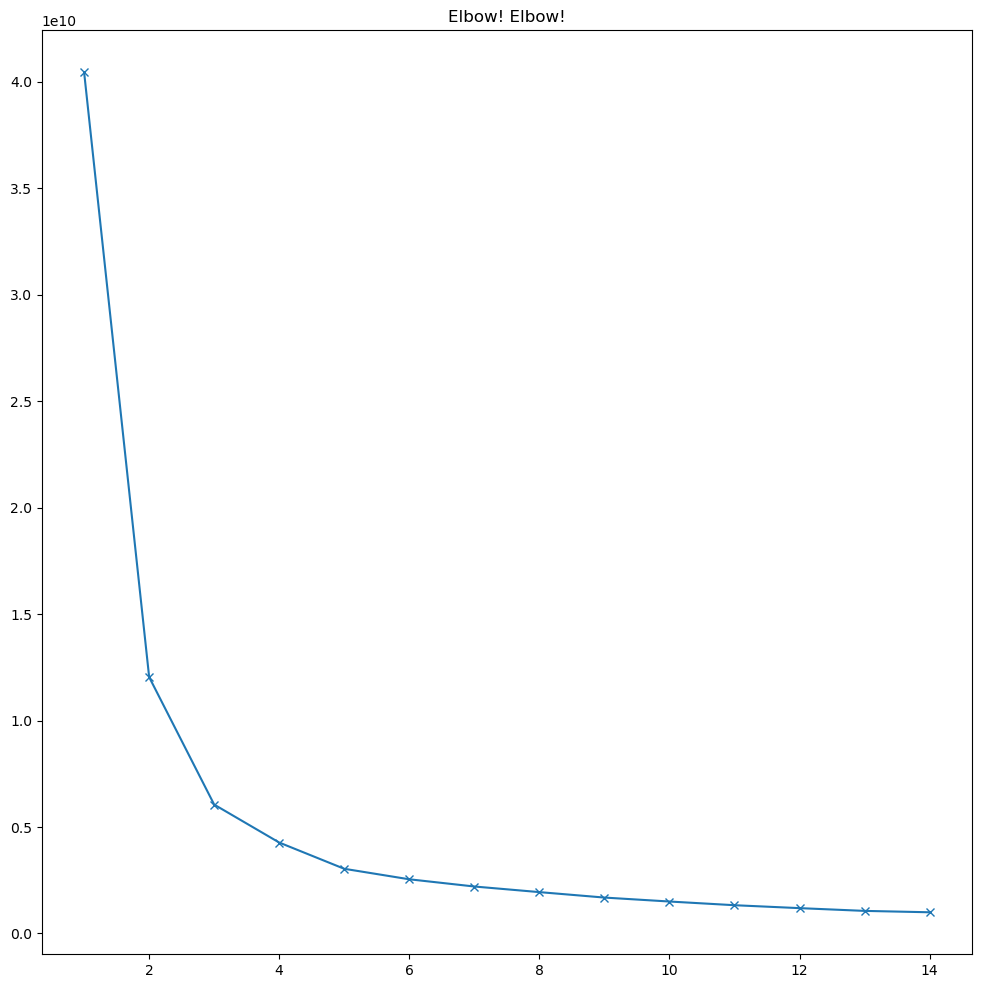

In [10]:
# plt.figure(figsize=(12,12))
# pd.Series(my_kmeans_dict).plot(marker='x')
# plt.title('Elbow! Elbow!')
# plt.show()

In [11]:
# # we preprocessed! huzzah!
# # lets make a clustering object from sklearn
# # Make a thing! Thats my favorite!
# k_means_prototype = KMeans(n_clusters=5)
# # fit the thing!!!!
# k_means_prototype.fit(X)
# # use the thing
# clusters = k_means_prototype.predict(X)

In [12]:
# train['clusters'] = clusters

In [13]:
# train.clusters.value_counts()

1    10525
3     4554
0     2200
2     1496
4      749
Name: clusters, dtype: int64

In [14]:
# X = train[['customer_age', 'quantity', 'revenue', 
#            'customer_gender_M', 'country_Germany',
#            'country_United Kingdom', 'country_United States']]

In [15]:
# {k: KMeans(k).fit(X
#                  ).inertia_ for k in range(2,20)}
# # alternatively:
# my_kmeans_dict = {}
# for k in range(1,15):
#     my_kmeans_dict[k] = KMeans(k).fit(X).inertia_

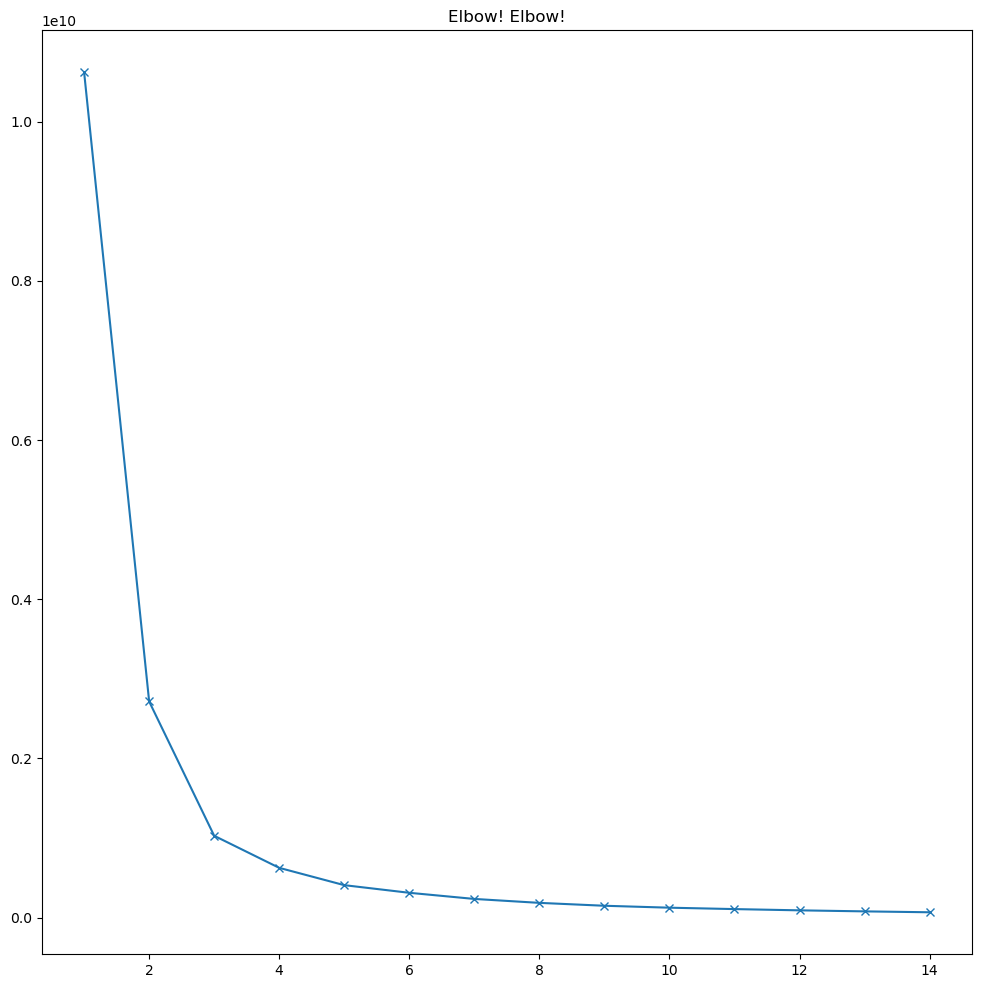

In [16]:
# plt.figure(figsize=(12,12))
# pd.Series(my_kmeans_dict).plot(marker='x')
# plt.title('Elbow! Elbow!')
# plt.show()

In [17]:
# train.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,clusters
8366,2016-06-08,2016,June,30,M,United Kingdom,England,Accessories,Tires and Tubes,2,...,0,0,1,0,0,1,0,1,0,1
3413,2016-01-16,2016,January,25,F,United Kingdom,England,Accessories,Helmets,2,...,0,0,0,0,0,0,0,1,0,0
11230,2016-03-14,2016,March,26,F,United States,California,Accessories,Bottles and Cages,2,...,0,0,0,0,0,0,0,0,1,1
29743,2015-11-16,2015,November,79,M,United States,California,Clothing,Vests,2,...,0,0,0,0,1,1,0,0,1,1
3176,2015-09-02,2015,September,46,F,France,Essonne,Bikes,Road Bikes,1,...,0,0,0,0,0,0,0,0,0,4


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [19]:
# train.columns

Index(['date', 'year', 'month', 'customer_age', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price',
       'sub_category_Bike Stands', 'sub_category_Bottles and Cages',
       'sub_category_Caps', 'sub_category_Cleaners', 'sub_category_Fenders',
       'sub_category_Gloves', 'sub_category_Helmets',
       'sub_category_Hydration Packs', 'sub_category_Jerseys',
       'sub_category_Mountain Bikes', 'sub_category_Road Bikes',
       'sub_category_Shorts', 'sub_category_Socks',
       'sub_category_Tires and Tubes', 'sub_category_Touring Bikes',
       'sub_category_Vests', 'customer_gender_M', 'country_Germany',
       'country_United Kingdom', 'country_United States', 'clusters'],
      dtype='object')

In [20]:
# train_ex = train[['date', 'year', 'month', 'customer_age', 'customer_gender', 'country',
#        'state', 'product_category', 'sub_category', 'quantity', 'unit_cost',
#        'unit_price', 'cost', 'revenue', 'total_price', 'clusters']]

In [21]:
def univariate_visulization(df):
    
    cat_cols, num_cols = [], []
    for col in df.columns:
        if df[col].dtype == "o":
            cat_cols.append(col)
        else:
            if df[col].nunique() < 5:
                cat_cols.append(col)
            else: 
                num_cols.append(col)
                
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        
        if col in cat_cols:
            print(f'Univariate assessment of feature {col}:')
            sns.countplot(data=df, x=col, color='violet', edgecolor='black')
            plt.xticks(rotation=45)
            plt.show()

        if col in num_cols:
            print(f'Univariate feature analysis of feature {col}: ')
            plt.hist(df[col], color='violet', edgecolor='black')
            plt.show()
            plt.xticks(rotation=45)
            df[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

Univariate assessment of feature year:


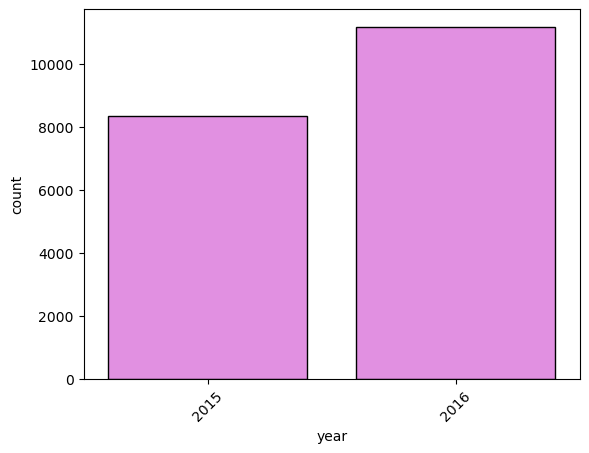

Univariate assessment of feature customer_gender:


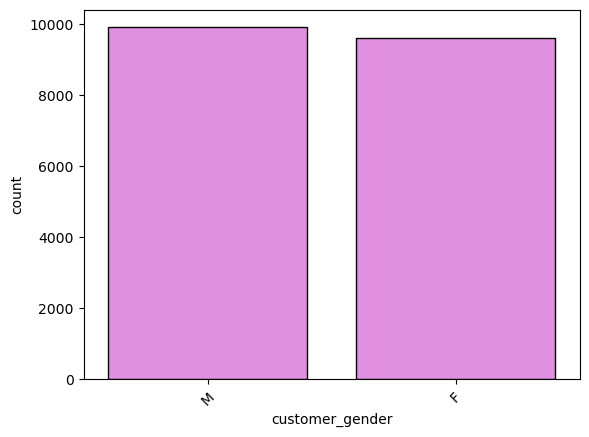

Univariate assessment of feature country:


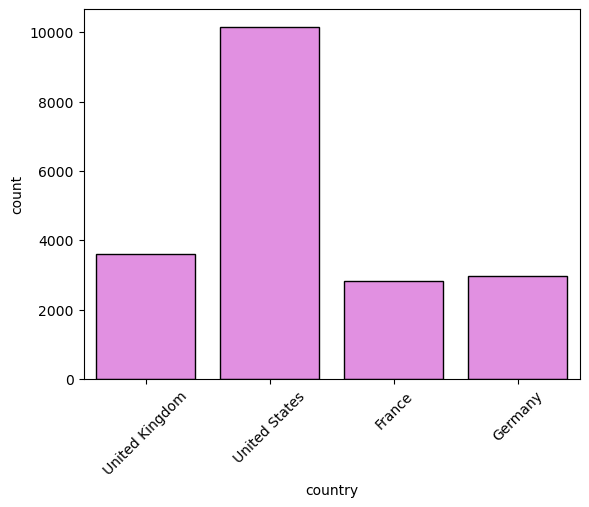

Univariate assessment of feature product_category:


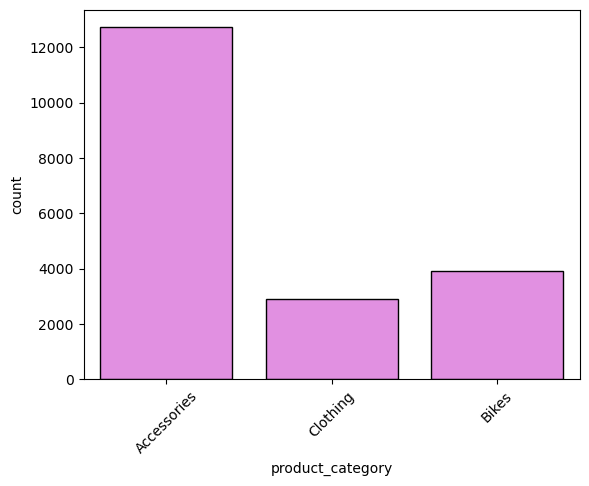

Univariate assessment of feature quantity:


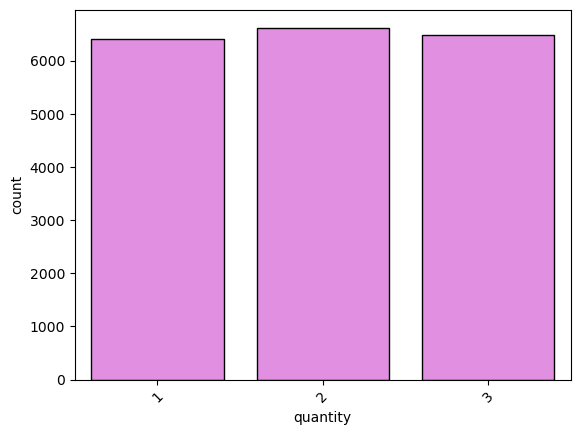

Univariate feature analysis of feature date: 


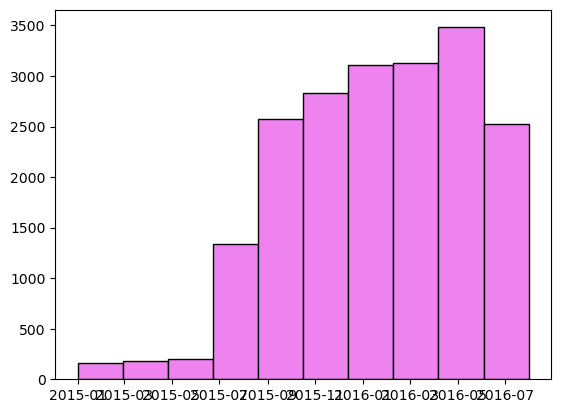

Univariate feature analysis of feature month: 


/var/folders/gn/krty7k0175z7_1gpw49cwdch0000gn/T/ipykernel_3695/1526226082.py:28: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[col].describe()


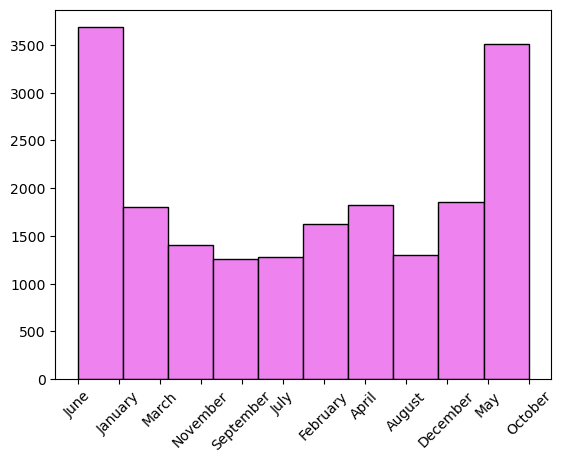

Univariate feature analysis of feature customer_age: 


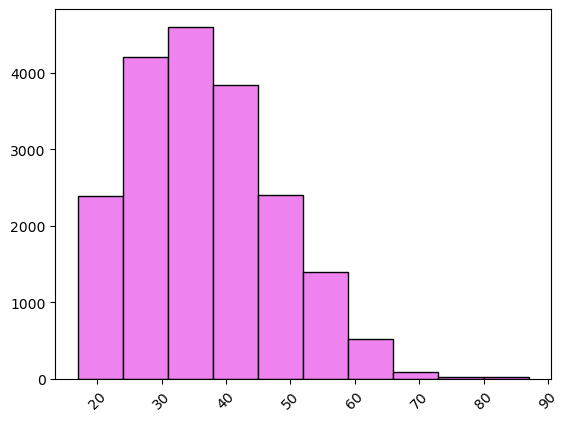

Univariate feature analysis of feature state: 


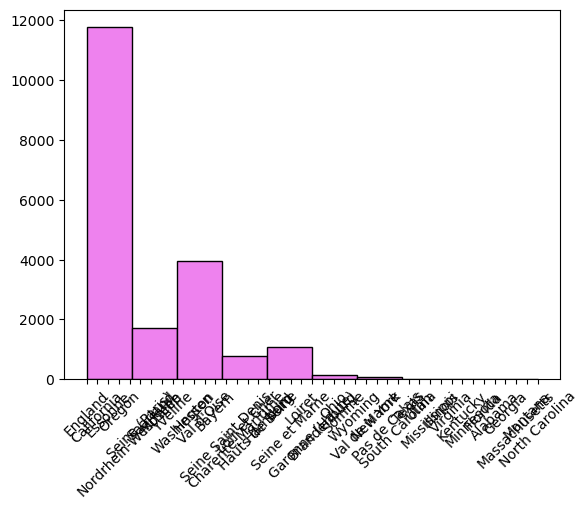

Univariate feature analysis of feature sub_category: 


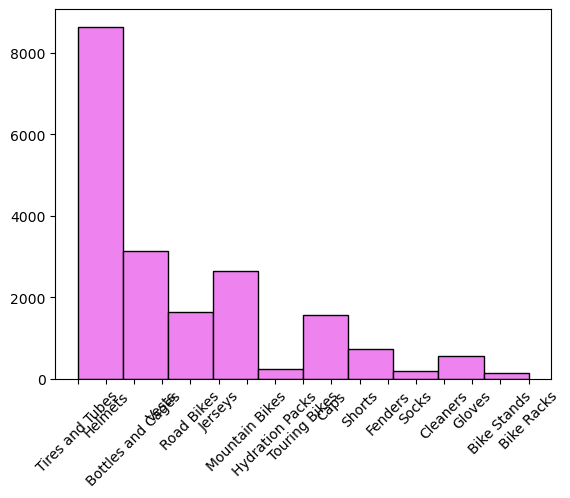

Univariate feature analysis of feature unit_cost: 


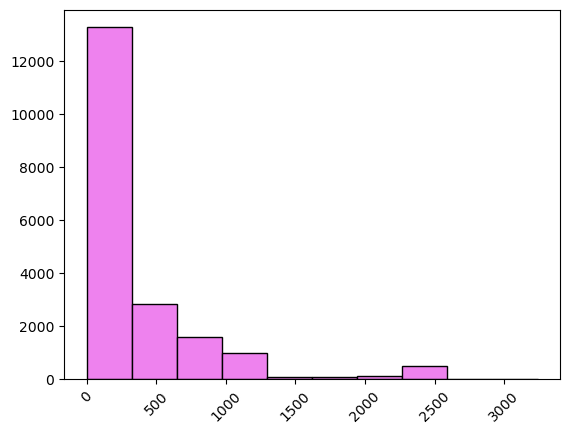

Univariate feature analysis of feature unit_price: 


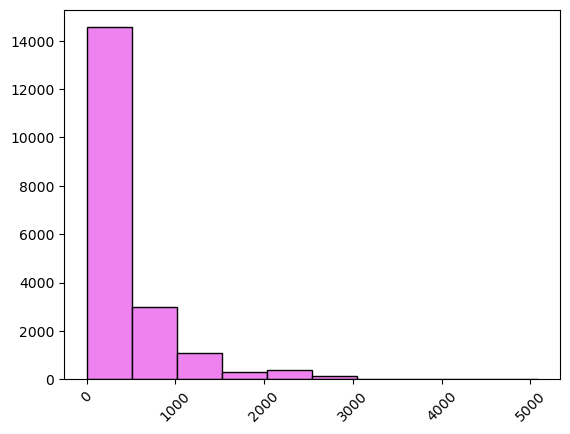

Univariate feature analysis of feature cost: 


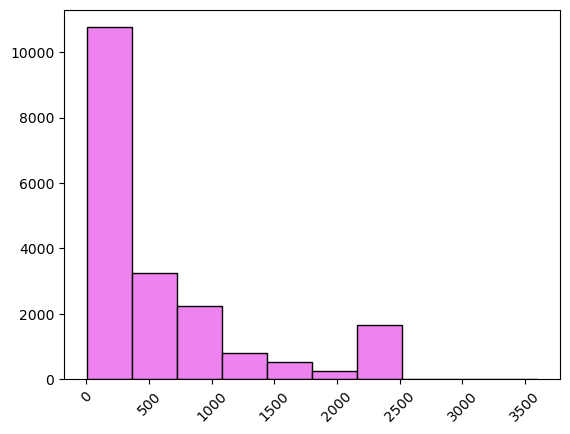

Univariate feature analysis of feature revenue: 


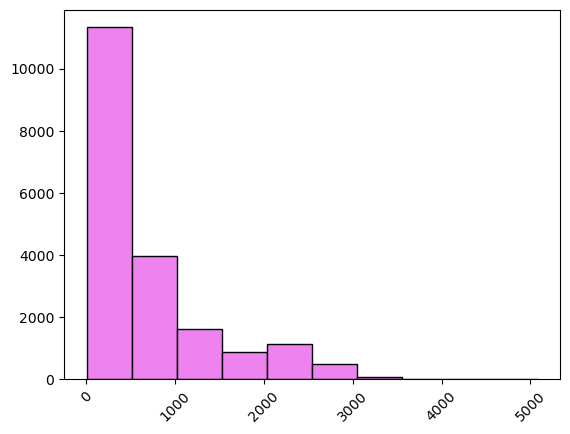

Univariate feature analysis of feature total_price: 


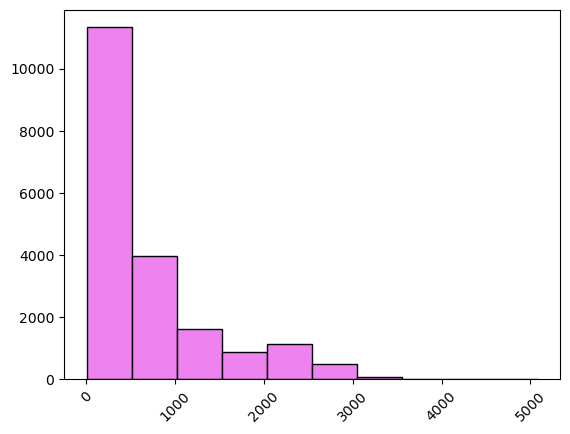

Univariate feature analysis of feature clusters: 


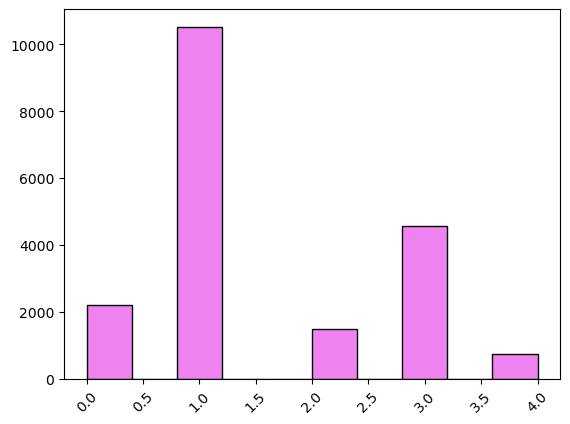

_____________________________________________________
_____________________________________________________



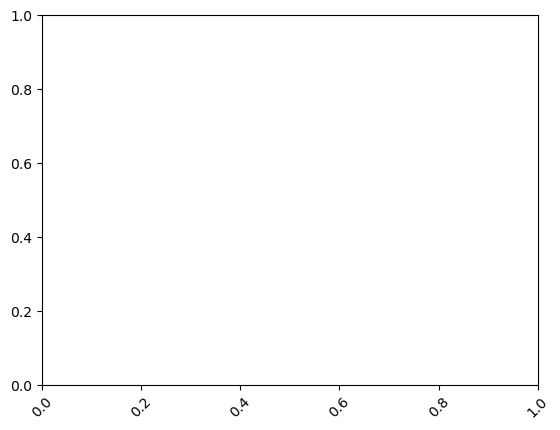

In [22]:
univariate_visulization(train_ex)

In [23]:
def bivariate_visulization(df, target):
    
    cat_cols = ['year', 'month', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'clusters']
    num_cols = ['customer_age', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price'] 
        
    print(f'Numeric Columns: {num_cols}')
    print(f'Categorical Columns: {cat_cols}')
    explore_cols = cat_cols + num_cols

    for col in explore_cols:
        if col in cat_cols:
            if col != target:
                print(f'Bivariate assessment of feature {col}:')
                sns.barplot(data = df, y = df[col], x = df[target], palette='crest')
                plt.xticks(rotation=45)
                plt.show()

#         if col in num_cols:
#             if col != target:
#                 print(f'Bivariate feature analysis of feature {col}: ')
#                 plt.scatter(y = df[col], x = df[target], color='turquoise')
#                 plt.axhline(df[target].mean(), ls=':', color='red')
#                 plt.axvline(df[col].mean(), ls=':', color='red')
#                 plt.xticks(rotation=45)
#                 plt.show()

    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

> Whats the ratio between costs and price on average

In [25]:
train_ex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19524 entries, 8366 to 15653
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              19524 non-null  datetime64[ns]
 1   year              19524 non-null  int64         
 2   month             19524 non-null  object        
 3   customer_age      19524 non-null  int64         
 4   customer_gender   19524 non-null  object        
 5   country           19524 non-null  object        
 6   state             19524 non-null  object        
 7   product_category  19524 non-null  object        
 8   sub_category      19524 non-null  object        
 9   quantity          19524 non-null  int64         
 10  unit_cost         19524 non-null  float64       
 11  unit_price        19524 non-null  float64       
 12  cost              19524 non-null  float64       
 13  revenue           19524 non-null  float64       
 14  total_price       1

Numeric Columns: ['customer_age', 'unit_cost', 'unit_price', 'cost', 'revenue', 'total_price']
Categorical Columns: ['year', 'month', 'customer_gender', 'country', 'state', 'product_category', 'sub_category', 'quantity', 'clusters']
Bivariate assessment of feature year:


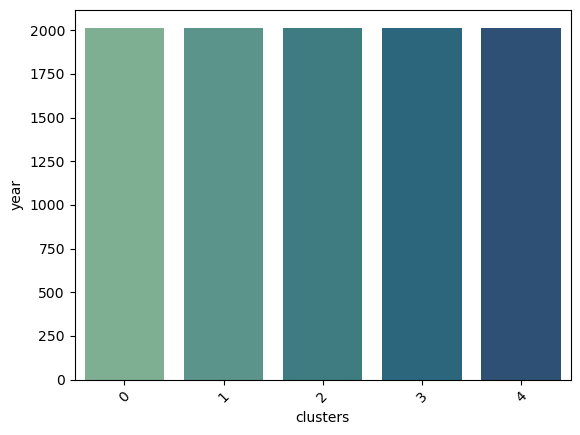

Bivariate assessment of feature month:


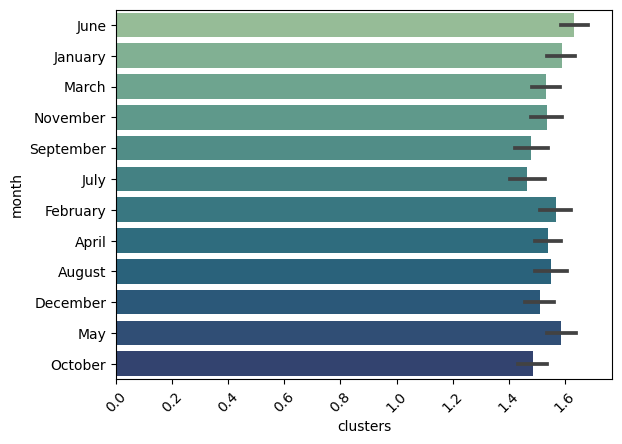

Bivariate assessment of feature customer_gender:


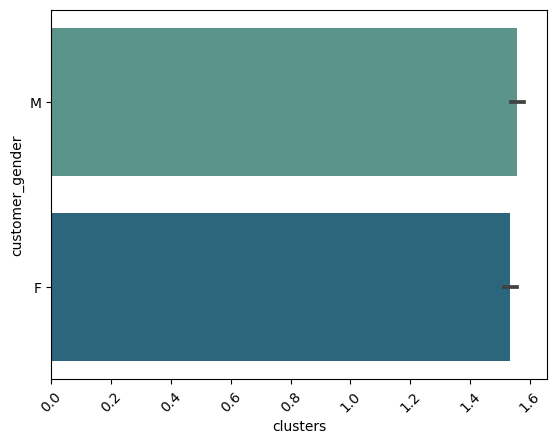

Bivariate assessment of feature country:


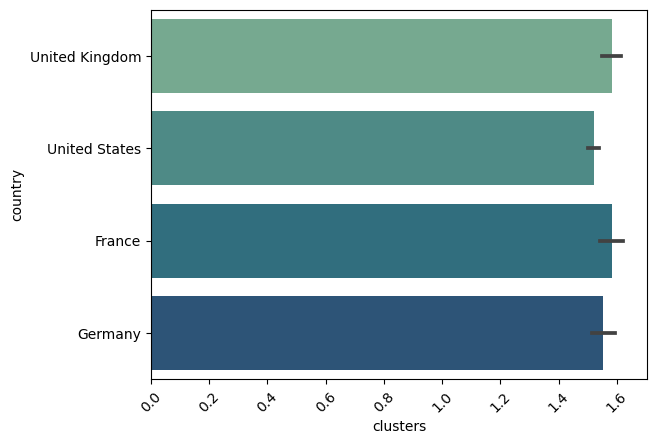

Bivariate assessment of feature state:


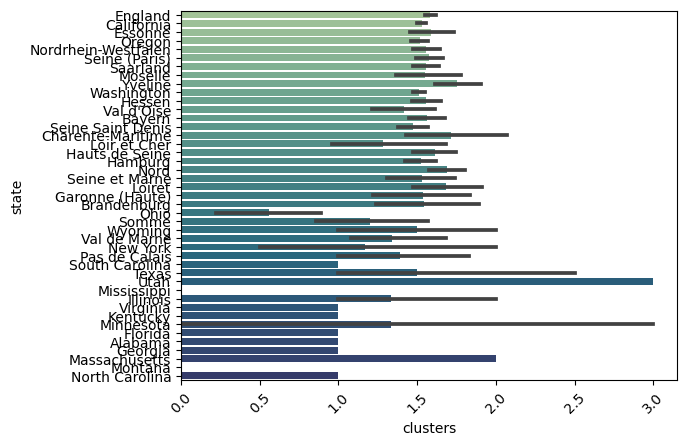

Bivariate assessment of feature product_category:


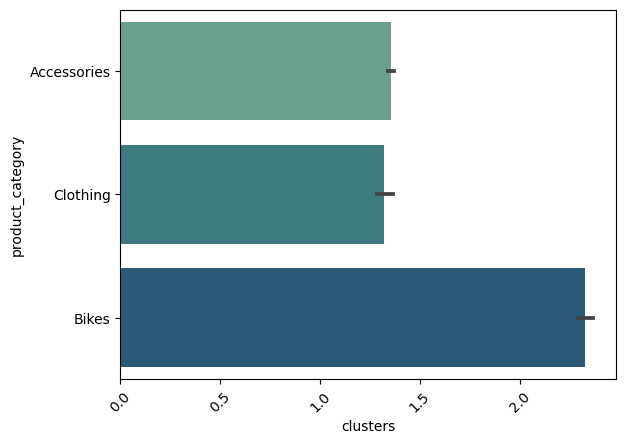

Bivariate assessment of feature sub_category:


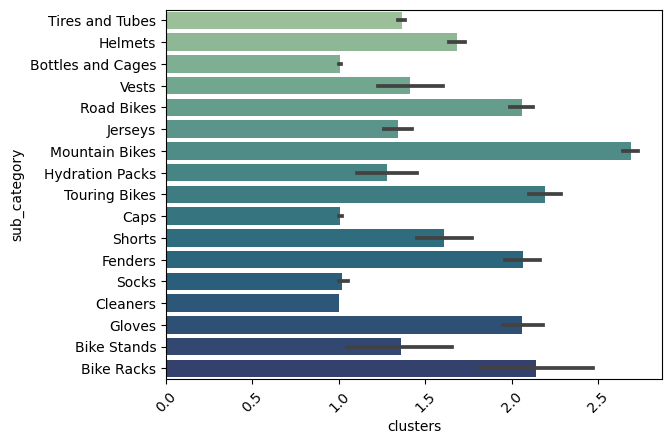

Bivariate assessment of feature quantity:


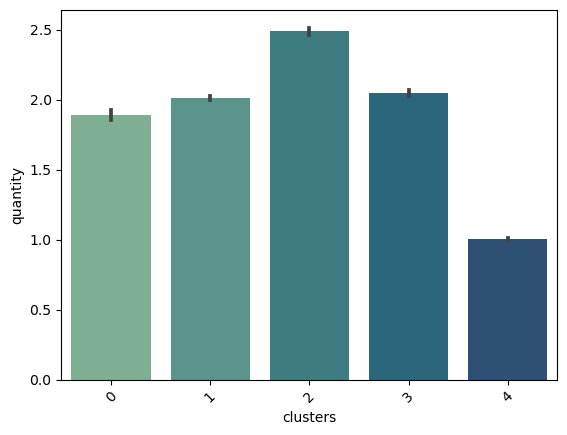

_____________________________________________________
_____________________________________________________



In [26]:
bivariate_visulization(train_ex, target='clusters')

In [27]:
df.head()

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Road Bikes,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,...,0,0,0,1,0,0,0,0,0,1
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,...,0,0,0,0,0,0,0,0,0,1
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,0,1,0,0,0,0,0,1
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,...,0,0,0,1,0,0,0,0,0,1
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,0,1,0,0,0,0,0,1


In [28]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


In [29]:
train, validate, test = c.engineer_clusters(train, validate, test, k=5)

In [30]:
print(train.clusters.value_counts())
print(validate.clusters.value_counts())
print(test.clusters.value_counts())

3    10524
0     4552
4     2203
2     1496
1      749
Name: clusters, dtype: int64
3    4499
0    1953
4     939
2     621
1     356
Name: clusters, dtype: int64
3    3726
0    1654
4     783
2     526
1     285
Name: clusters, dtype: int64


Numeric Columns: ['customer_age', 'unit_cost', 'unit_price', 'cost', 'revenue', 'total_price']
Categorical Columns: ['year', 'month', 'customer_gender', 'country', 'state', 'product_category', 'sub_category', 'quantity', 'clusters']
Bivariate assessment of feature year:


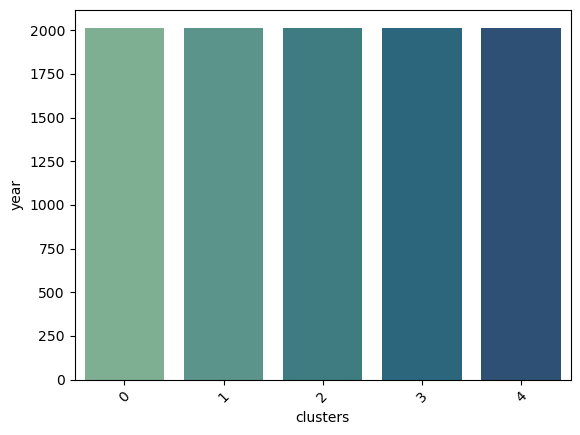

Bivariate assessment of feature month:


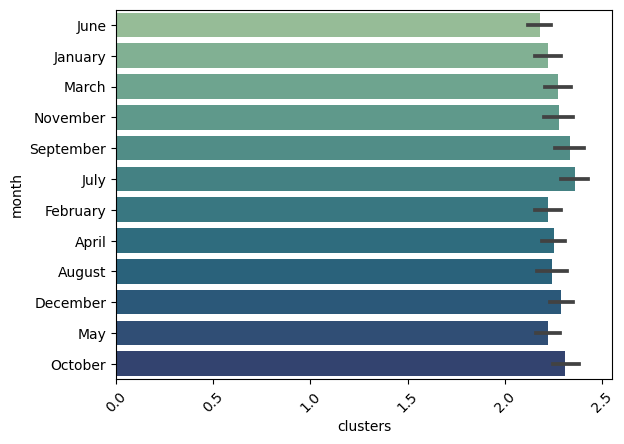

Bivariate assessment of feature customer_gender:


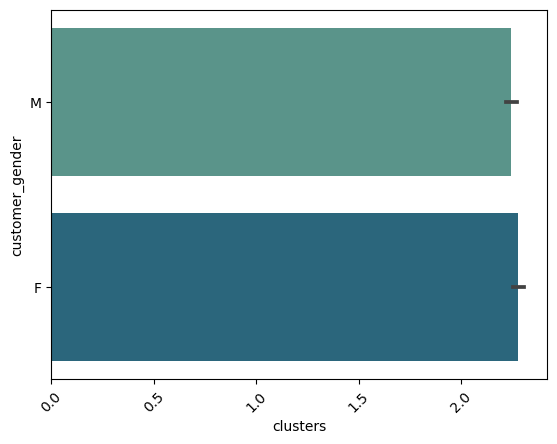

Bivariate assessment of feature country:


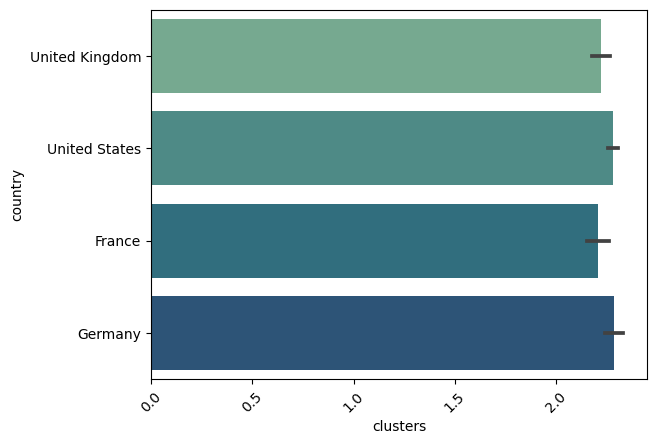

Bivariate assessment of feature state:


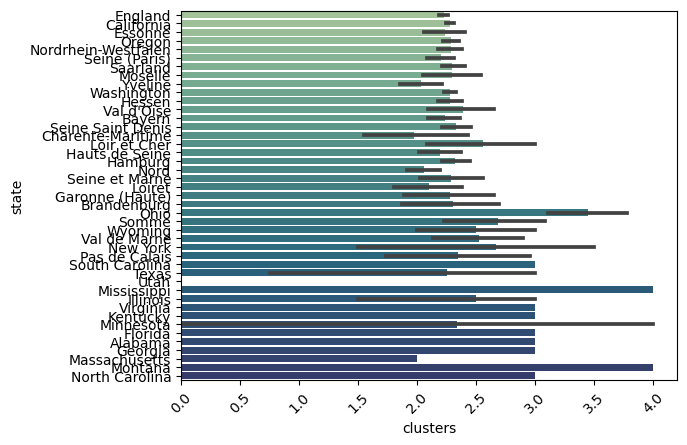

Bivariate assessment of feature product_category:


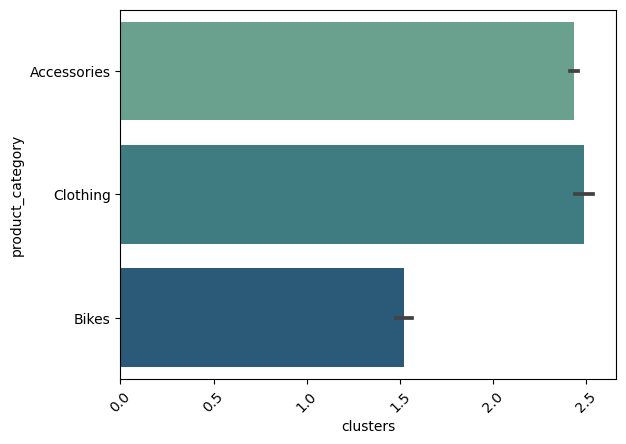

Bivariate assessment of feature sub_category:


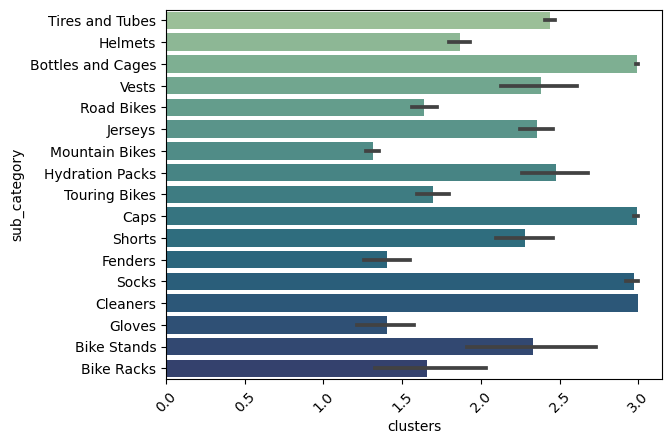

Bivariate assessment of feature quantity:


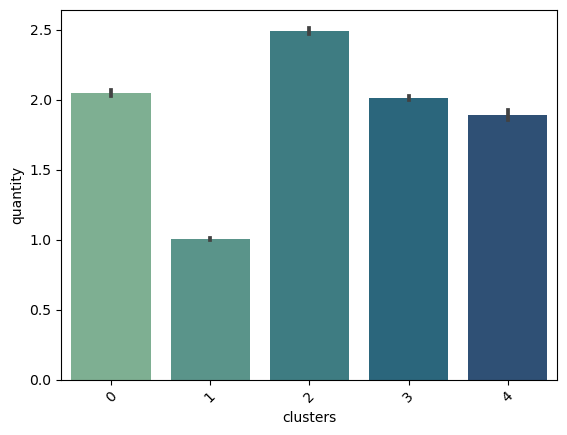

_____________________________________________________
_____________________________________________________



In [31]:
bivariate_visulization(train, target='clusters')

In [32]:
explore_cols = ['date', 'year', 'month', 'customer_age', 'customer_gender', 'country',
       'state', 'product_category', 'sub_category', 'quantity', 'unit_cost',
       'unit_price', 'cost', 'revenue', 'total_price', 'clusters']

cluster_0 = train[train.clusters == 0][explore_cols]
cluster_1 = train[train.clusters == 1][explore_cols]
cluster_2 = train[train.clusters == 2][explore_cols]
cluster_3 = train[train.clusters == 3][explore_cols]
cluster_4 = train[train.clusters == 4][explore_cols]

In [33]:
clusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]

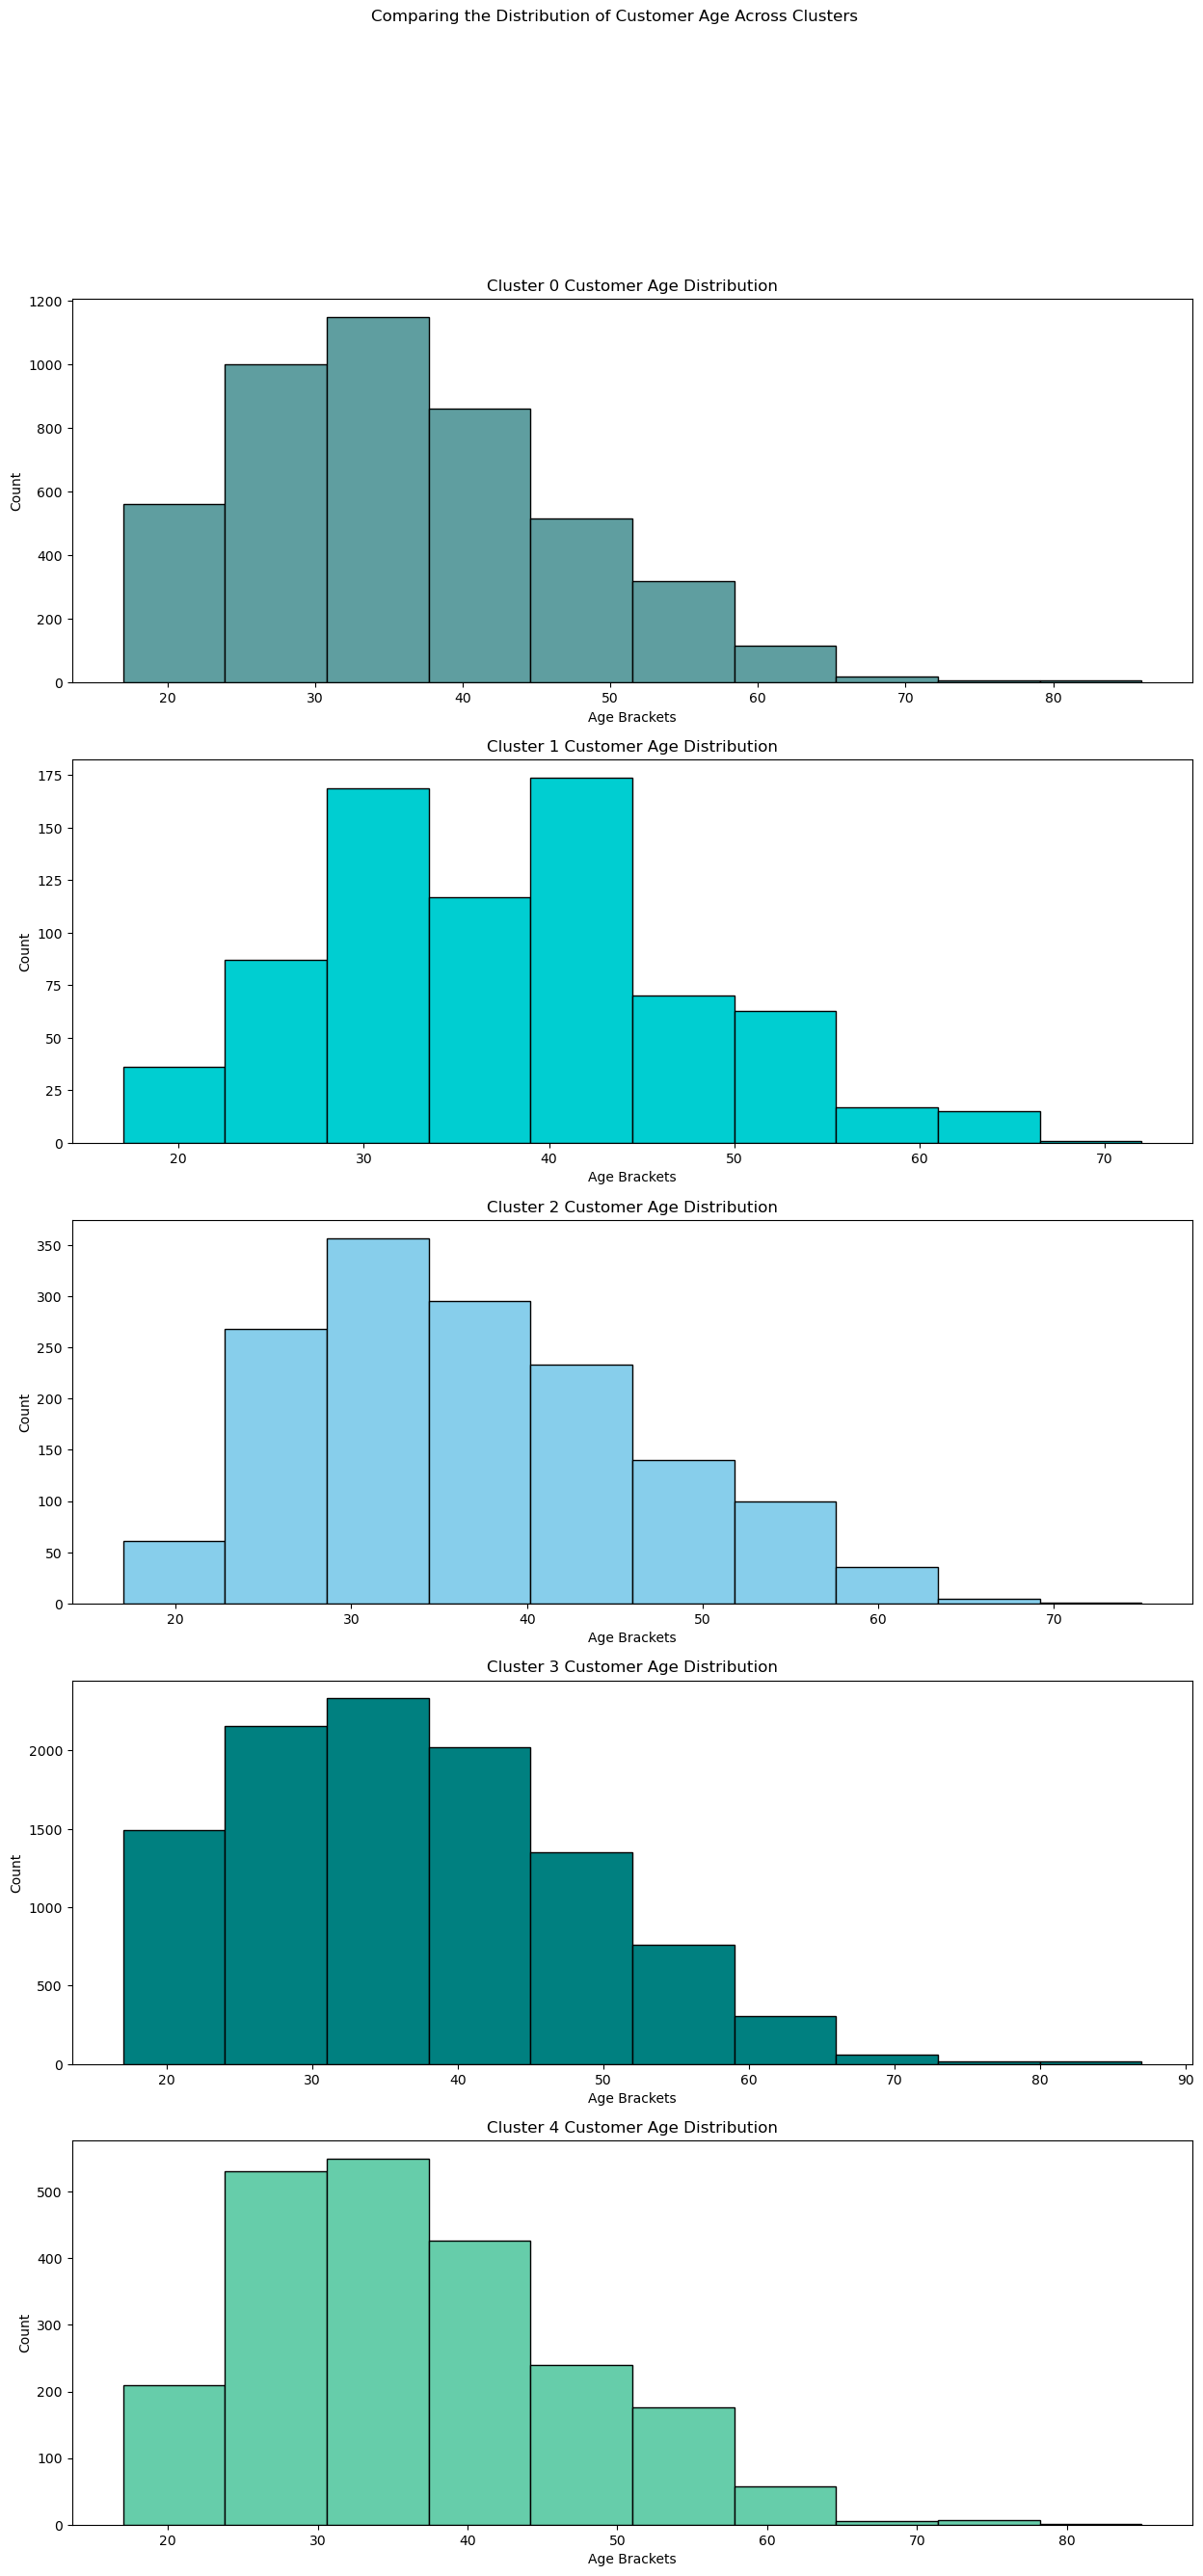

In [34]:
fig, axs = plt.subplots(len(clusters), 1, figsize=(15, 30))

axs[0].hist(cluster_0.customer_age, color='cadetblue', ec='black')
axs[1].hist(cluster_1.customer_age, color='darkturquoise', ec='black')
axs[2].hist(cluster_2.customer_age, color='skyblue', ec='black')
axs[3].hist(cluster_3.customer_age, color='teal', ec='black')
axs[4].hist(cluster_4.customer_age, color='mediumaquamarine', ec='black')

fig.suptitle("Comparing the Distribution of Customer Age Across Clusters")
axs[0].set_title('Cluster 0 Customer Age Distribution')
axs[1].set_title('Cluster 1 Customer Age Distribution')
axs[2].set_title('Cluster 2 Customer Age Distribution')
axs[3].set_title('Cluster 3 Customer Age Distribution')
axs[4].set_title('Cluster 4 Customer Age Distribution')

axs[0].set_xlabel('Age Brackets')
axs[0].set_ylabel('Count')
axs[1].set_xlabel('Age Brackets')
axs[1].set_ylabel('Count')
axs[2].set_xlabel('Age Brackets')
axs[2].set_ylabel('Count')
axs[3].set_xlabel('Age Brackets')
axs[3].set_ylabel('Count')
axs[4].set_xlabel('Age Brackets')
axs[4].set_ylabel('Count')

plt.show()

In [35]:
def get_count_gender():
    ''' Gets boxplots of acquired continuous variables'''

    plt.figure(figsize=(5, 25))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Gender for cluster_{i}')

        # Display boxplot for column.
        sns.countplot(x=cluster['customer_gender'], hue=cluster['product_category'], palette='crest')

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

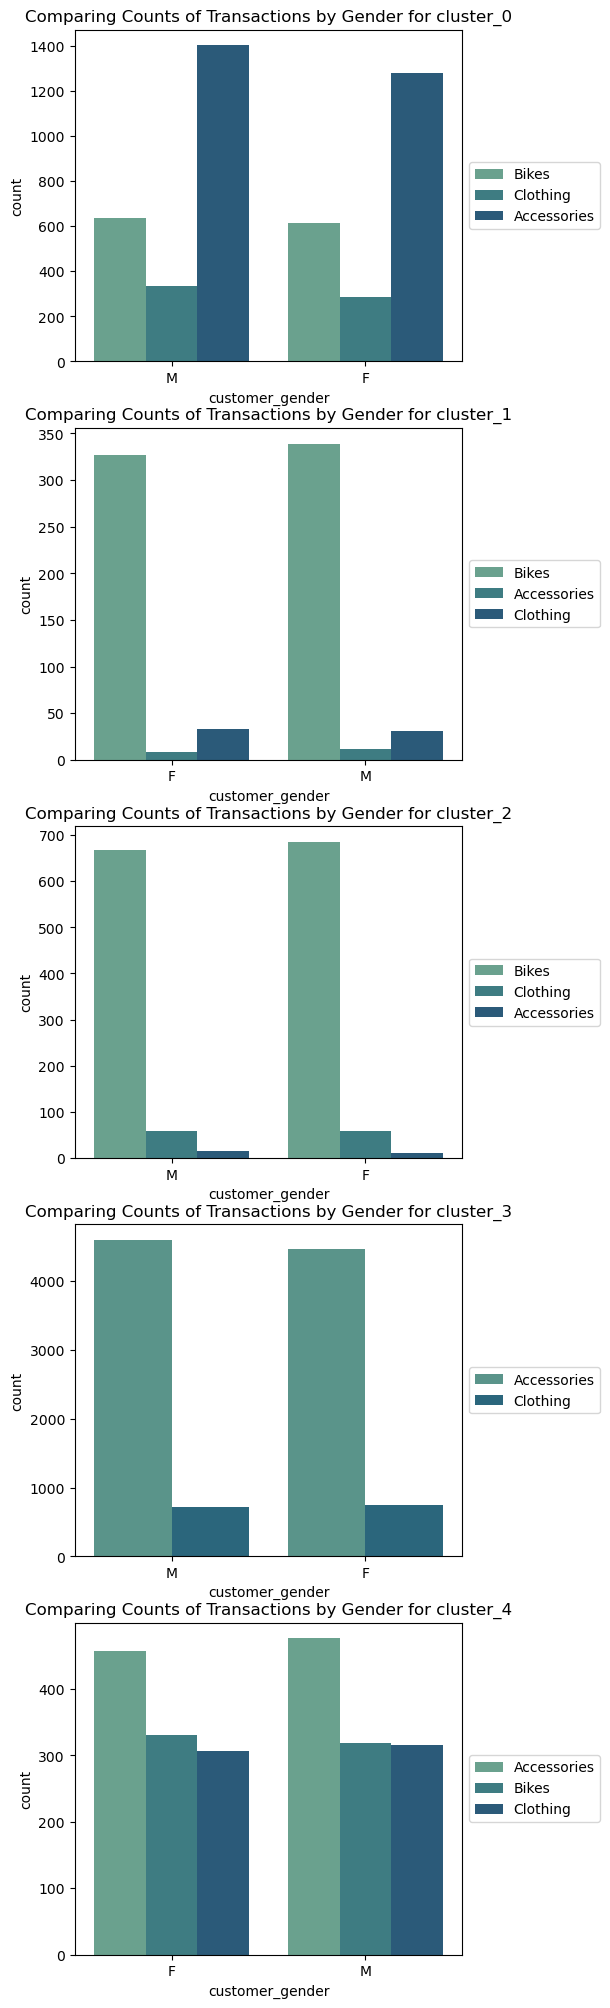

In [36]:
get_count_gender()

In [37]:
train.groupby('customer_gender').revenue.sum()

customer_gender
F    6156835.0
M    6339001.0
Name: revenue, dtype: float64

In [38]:
train.groupby(['clusters', 'customer_gender']).revenue.mean()

clusters  customer_gender
0         F                   674.709441
          M                   678.703797
1         F                  2322.054348
          M                  2317.955381
2         F                  2323.274536
          M                  2343.880054
3         F                   132.647206
          M                   137.302990
4         F                  1268.427788
          M                  1242.680794
Name: revenue, dtype: float64

In [39]:
train.groupby(['clusters', 'product_category']).revenue.mean()

clusters  product_category
0         Accessories          679.975382
          Bikes                665.120897
          Clothing             686.485531
1         Accessories         2840.052632
          Bikes               2329.882883
          Clothing            2062.406250
2         Accessories         2245.730769
          Bikes               2353.447894
          Clothing            2122.256410
3         Accessories          127.842994
          Clothing             179.182004
4         Accessories         1193.183280
          Bikes               1243.320988
          Clothing            1361.545016
Name: revenue, dtype: float64

In [40]:
train.groupby(['clusters', 'product_category']).revenue.mean()

clusters  product_category
0         Accessories          679.975382
          Bikes                665.120897
          Clothing             686.485531
1         Accessories         2840.052632
          Bikes               2329.882883
          Clothing            2062.406250
2         Accessories         2245.730769
          Bikes               2353.447894
          Clothing            2122.256410
3         Accessories          127.842994
          Clothing             179.182004
4         Accessories         1193.183280
          Bikes               1243.320988
          Clothing            1361.545016
Name: revenue, dtype: float64

In [41]:
cluster_3 = train[train.clusters == 3]

In [42]:
cluster_3

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,clusters
8366,2016-06-08,2016,June,30,M,United Kingdom,England,Accessories,Tires and Tubes,2,...,0,0,1,0,0,1,0,1,0,3
11230,2016-03-14,2016,March,26,F,United States,California,Accessories,Bottles and Cages,2,...,0,0,0,0,0,0,0,0,1,3
29743,2015-11-16,2015,November,79,M,United States,California,Clothing,Vests,2,...,0,0,0,0,1,1,0,0,1,3
13869,2016-07-20,2016,July,19,M,United States,Oregon,Accessories,Bottles and Cages,1,...,0,0,0,0,0,1,0,0,1,3
34243,2016-01-07,2016,January,17,M,United States,California,Accessories,Tires and Tubes,1,...,0,0,1,0,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,2015-08-11,2015,August,43,M,United Kingdom,England,Accessories,Tires and Tubes,1,...,0,0,1,0,0,1,0,1,0,3
2670,2015-12-02,2015,December,59,F,United States,California,Accessories,Tires and Tubes,2,...,0,0,1,0,0,0,0,0,1,3
2304,2016-04-29,2016,April,53,M,United States,California,Accessories,Helmets,3,...,0,0,0,0,0,1,0,0,1,3
16110,2016-05-01,2016,May,35,M,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,1,0,0,1,0,0,1,3


In [43]:
cluster_1.groupby('sub_category').revenue.mean()

sub_category
Bike Racks         3628.600000
Bike Stands        1992.333333
Hydration Packs    1949.666667
Jerseys            1982.285714
Mountain Bikes     2359.497283
Road Bikes         2175.433333
Shorts             2101.735294
Touring Bikes      2473.127119
Vests              2100.777778
Name: revenue, dtype: float64

In [44]:
cluster_3.groupby('sub_category').revenue.mean()

sub_category
Bike Racks           243.928571
Bike Stands          248.800000
Bottles and Cages    133.015884
Caps                 169.215591
Cleaners             151.601974
Fenders              208.738462
Gloves               192.704348
Helmets              214.285141
Hydration Packs      206.291667
Jerseys              202.787402
Shorts               210.180000
Socks                169.045685
Tires and Tubes      104.939958
Vests                215.133333
Name: revenue, dtype: float64

In [45]:
cluster_1.groupby('customer_gender').revenue.mean()

customer_gender
F    2322.054348
M    2317.955381
Name: revenue, dtype: float64

In [46]:
cluster_3.groupby('customer_gender').revenue.mean()

customer_gender
F    132.647206
M    137.302990
Name: revenue, dtype: float64

In [47]:
import cbm_explore as ex

Opening data from local file.


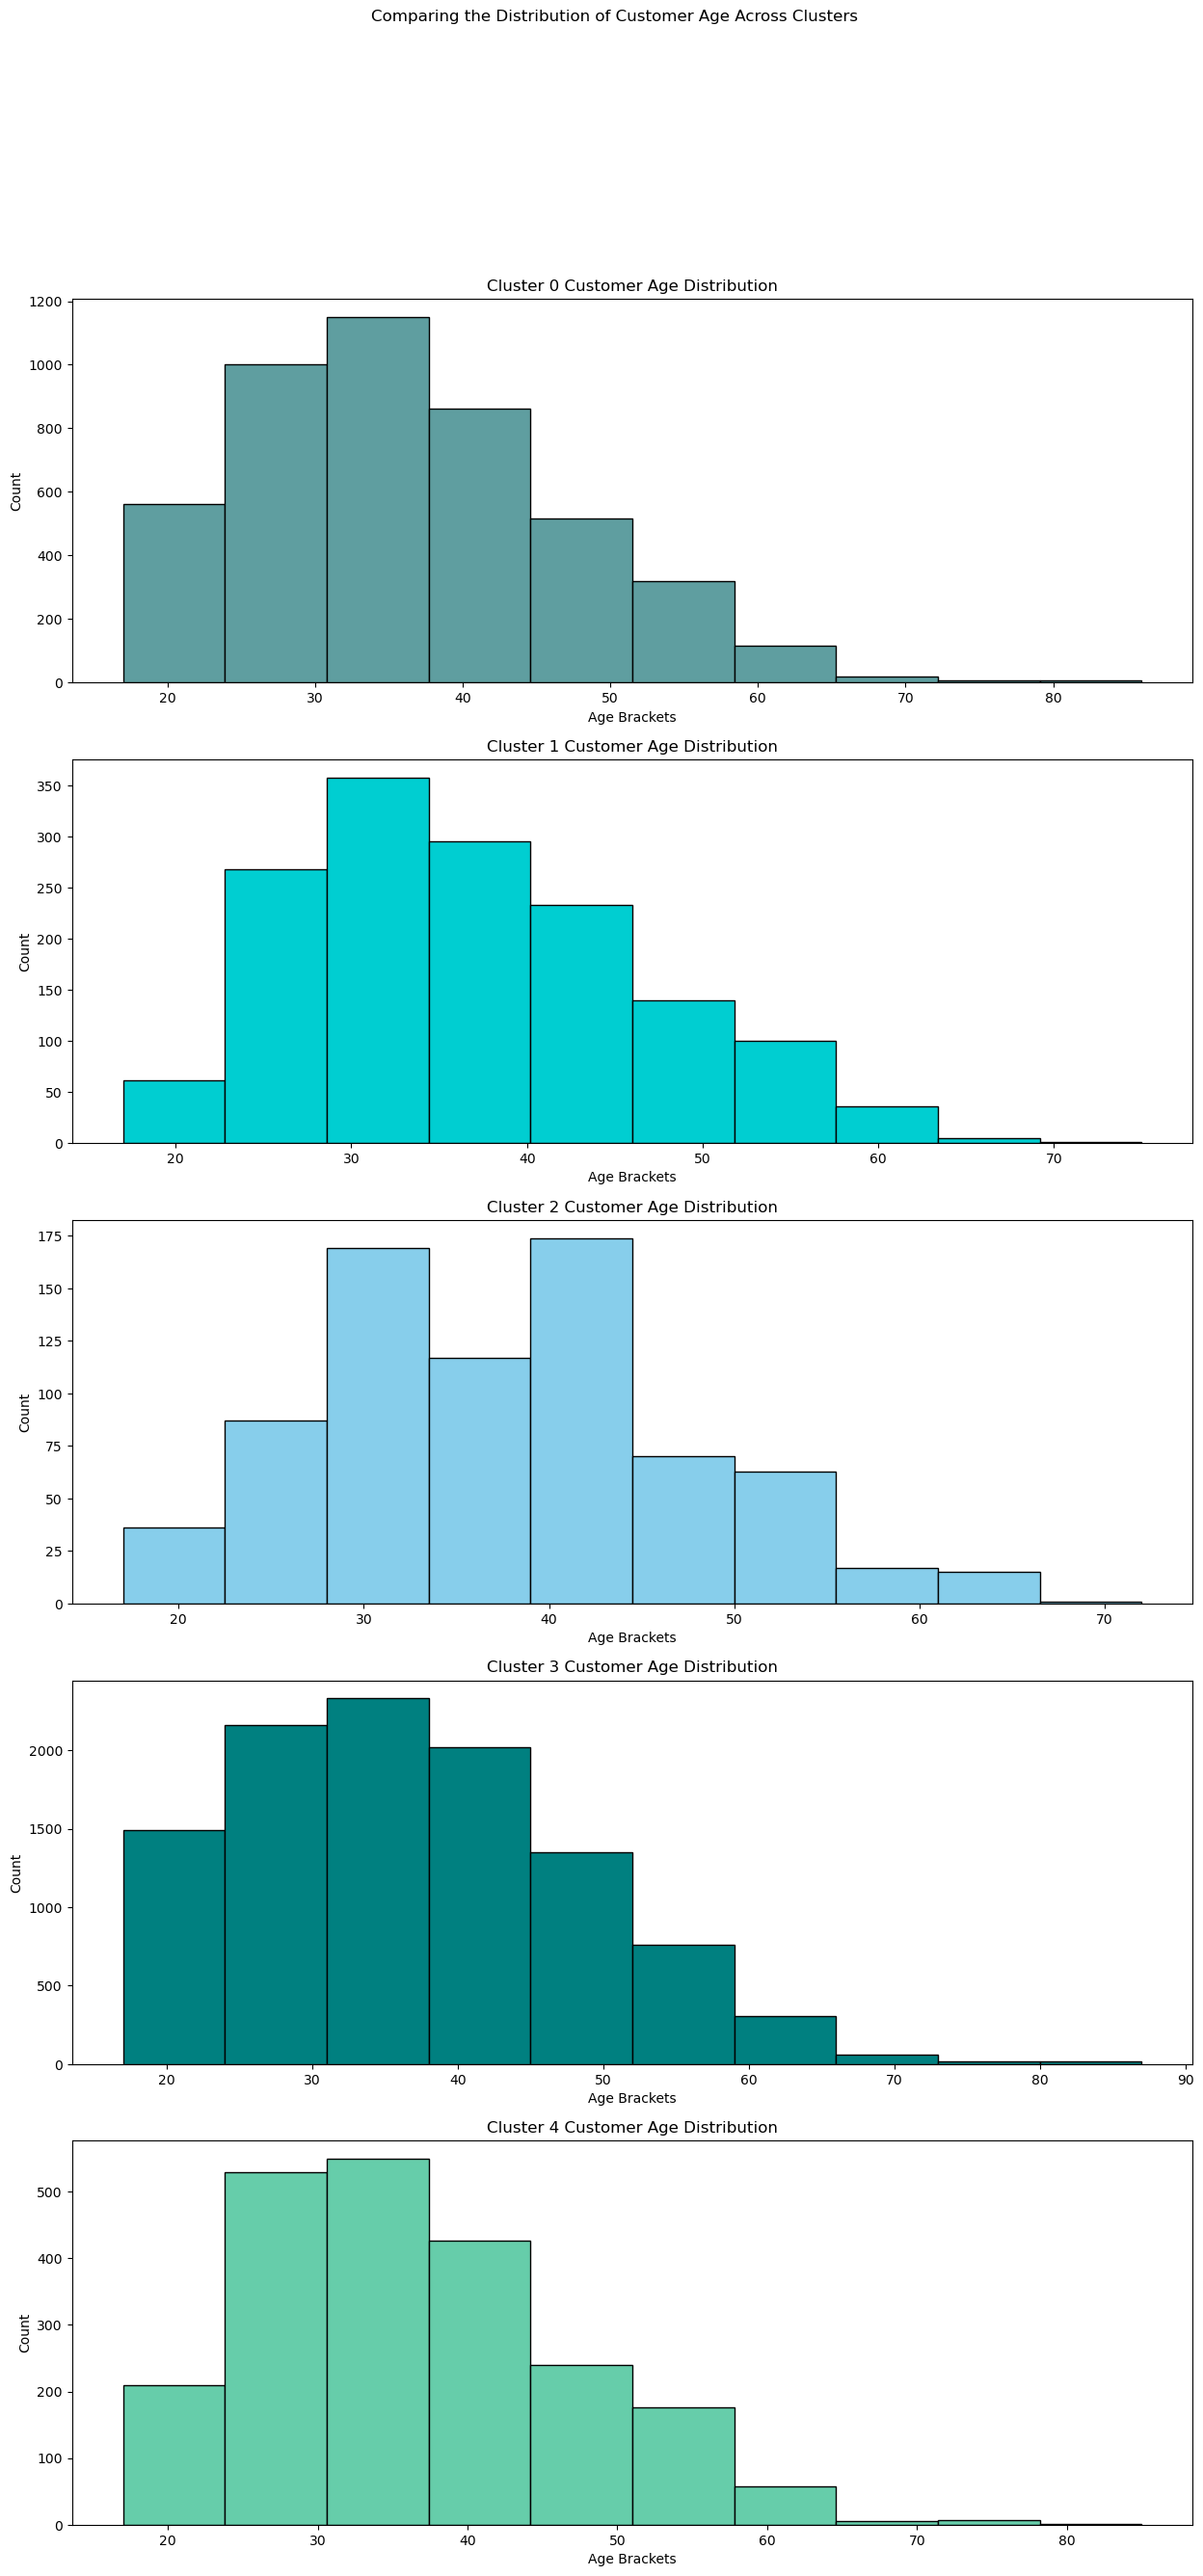

In [48]:
ex.viz_distribution_age()

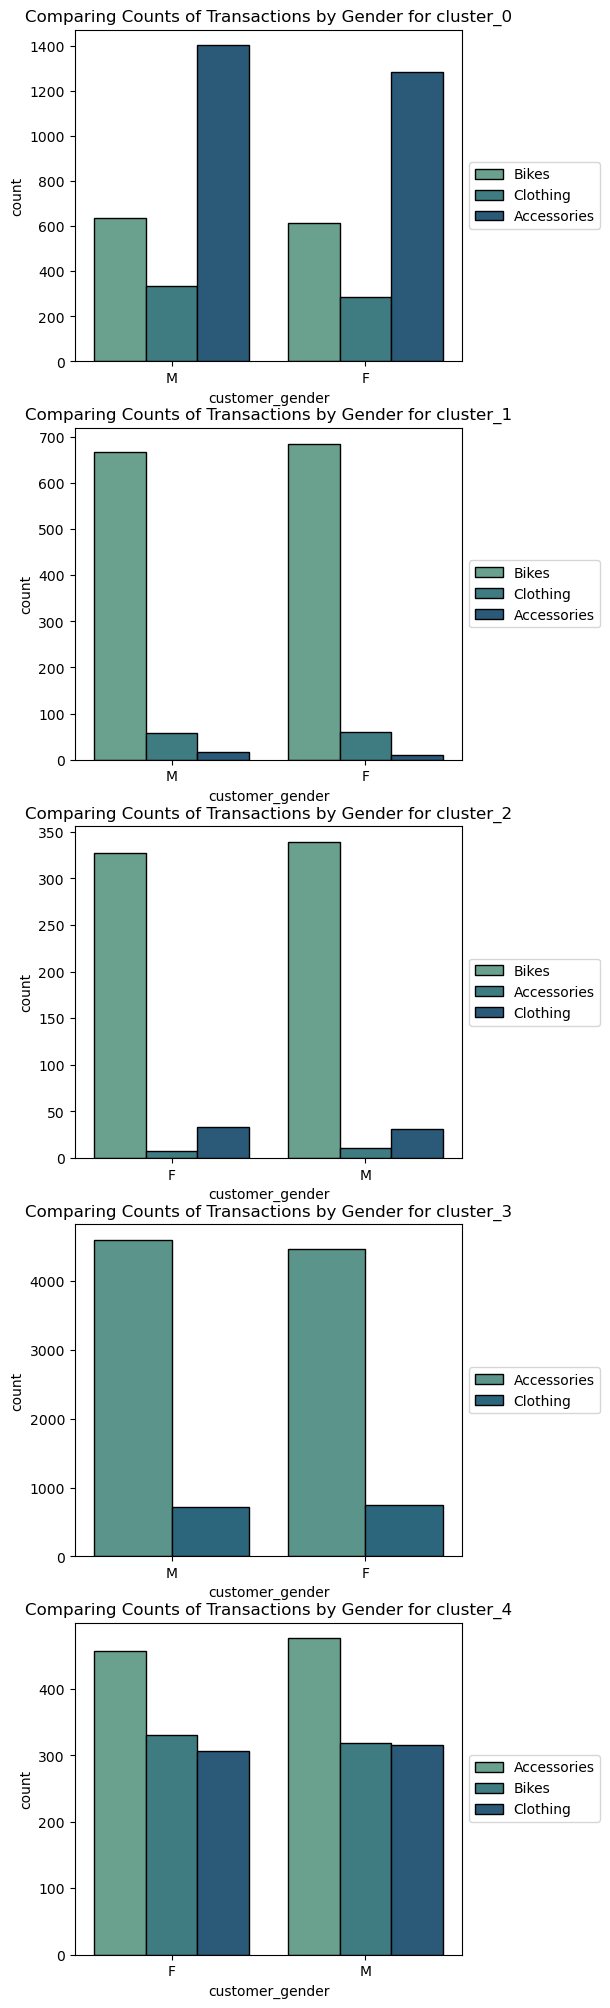

In [49]:
ex.get_count_gender()

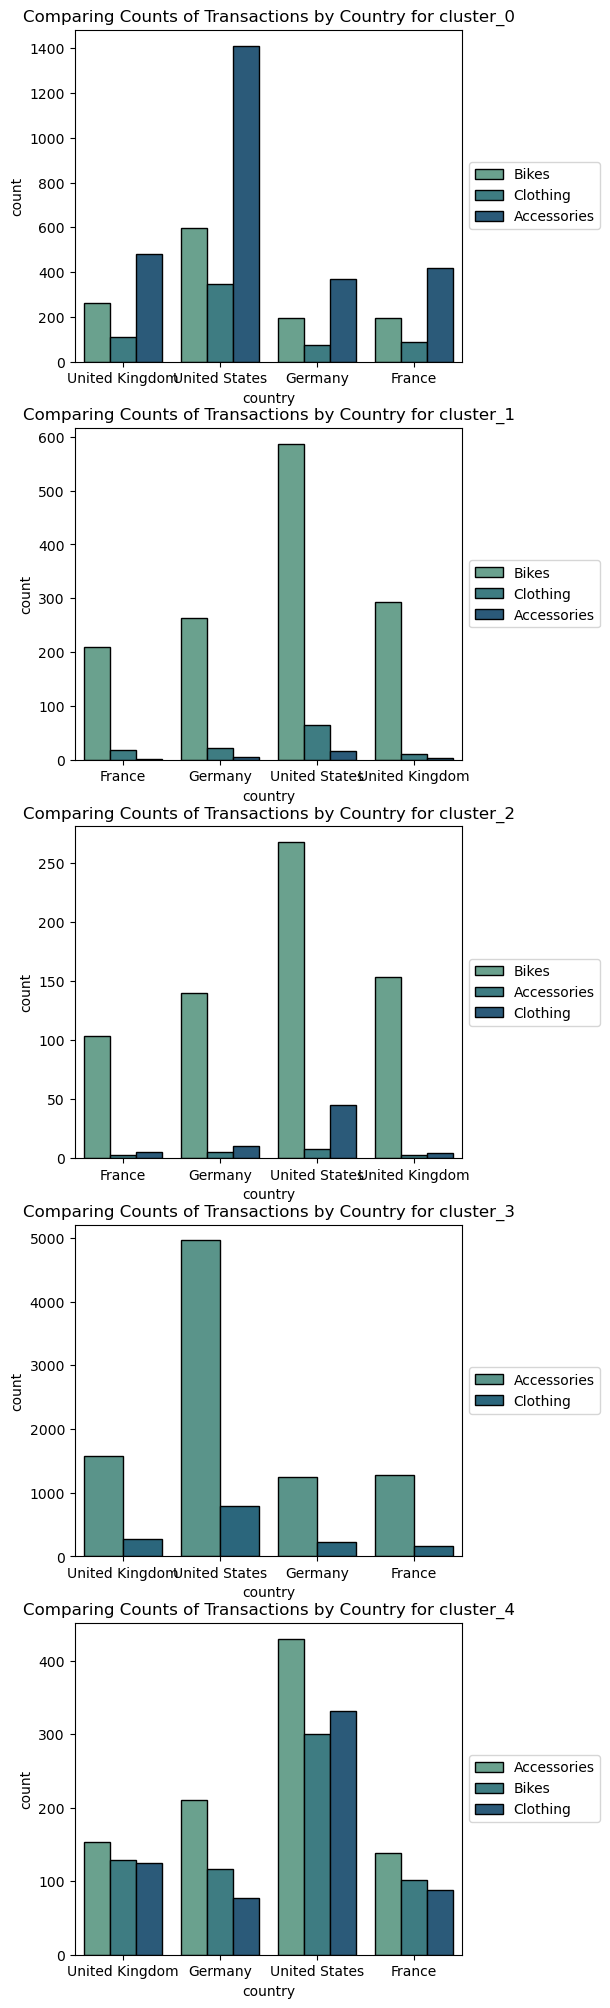

In [50]:
ex.get_count_country()

In [69]:
def get_revenue_by_subcat():
    ''' Gets boxplots of acquired continuous variables'''

    plt.figure(figsize=(15, 30))

    for i, cluster in enumerate(clusters):
        
        plot_number = i + 1 
        
        # Create subplot.
        plt.subplot(len(clusters), 1, plot_number)

        # Title with column name.
        plt.title(f'Comparing Counts of Transactions by Country for cluster_{i}')

        # Display boxplot for column.
        sns.boxplot(x=cluster['sub_category'], y=cluster['revenue'], palette='crest')
        
        plt.xticks(rotation=45)
        
        # using padding
        plt.tight_layout(pad=5.0)
        
        # Hide gridlines.
        plt.grid(False)

    plt.show()

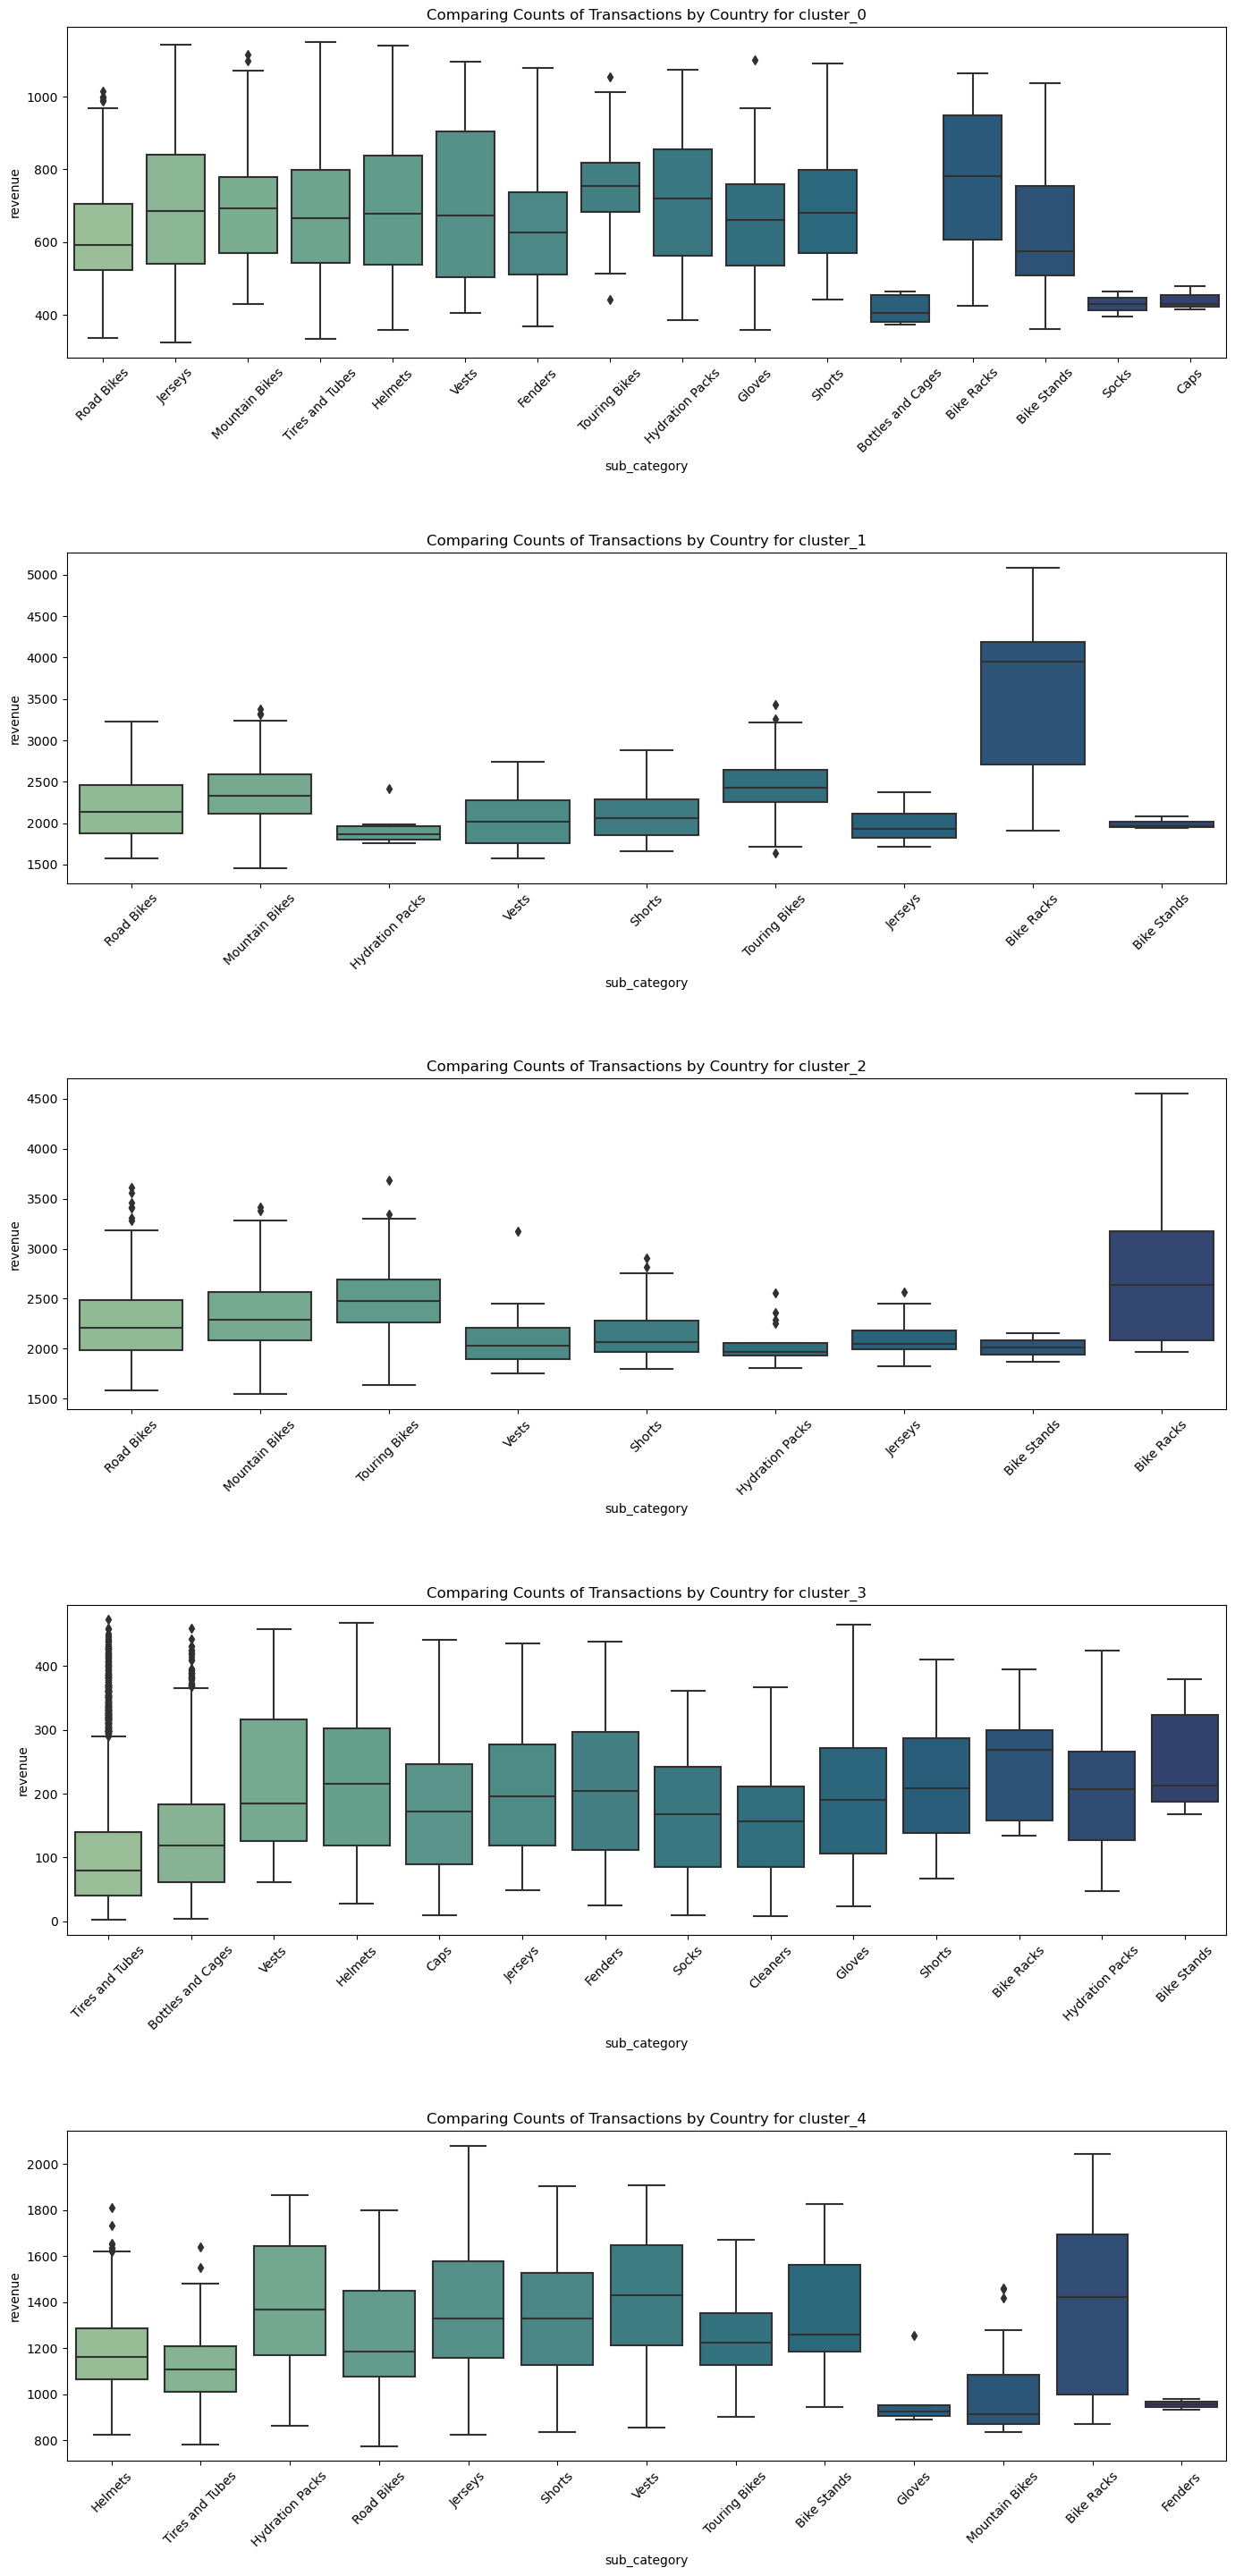

In [70]:
get_revenue_by_subcat()